In [1]:
# %load init_setup/setup.py
# ==- INITIAL SETUP -===============================================================================
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
import ipywidgets as widgets

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 16})

# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)

# ==- COLOR PALETTE -===============================================================================
c_red = "#e6194b" # red
c_gre = "#3cb44b" # green
c_yel = "#ffe119" # yellow
c_blu = "#4363d8" # blue
c_ora = "#f58231" # orange
c_pur = "#911eb4" # purple
c_cya = "#42d4f4" # cyan
c_mag = "#f032e6" # magenta
c_lim = "#bfef45" # lime
c_pin = "#fabebe" # pink
c_tea = "#469990" # teal
c_lav = "#e6beff" # lavender
c_bro = "#9A6324" # brown
c_bei = "#fffac8" # beige
c_mar = "#800000" # maroon
c_min = "#aaffc3" # mint
c_oli = "#808000" # olive
c_apr = "#ffd8b1" # apricot
c_nav = "#000075" # navy
c_gra = "#a9a9a9" # gray
c_whi = "#ffffff" # white
c_bla = "#000000" # black

accessibility_95    = [c_red, c_gre, c_blu, c_yel, c_ora, c_pur, c_cya,
                       c_mag, c_lim, c_pin, c_tea, c_lav, c_bro, c_bei,
                       c_mar, c_min, c_oli, c_apr, c_nav, c_gra, c_bla]
accessibility_99    = [c_red, c_gre, c_blu, c_yel, c_ora, c_cya, c_mag,
                       c_pin, c_tea, c_lav, c_bro, c_bei, c_mar, c_min,
                       c_nav, c_gra, c_bla]
accessibility_99_99 = [c_blu, c_yel, c_ora, c_pin, c_lav, c_mar, c_nav,
                       c_gra, c_bla]
accessibility_100   = [c_blu, c_yel, c_gra, c_bla]


In [2]:
# %load init_setup/setup2.py
matplotlib.rcParams.update({'font.size': 16})


In [3]:
# ==- SPECIAL GRADIENTS -===========================================================================
grad_7     = np.array([c_red, "#e9355f", "#ed5072", "#f06c84", "#f38798", "#f6a3ab", c_pin])
grad_9_red = np.array([c_red, "#e82e59", "#eb4267", "#ed5776", "#f06c84", "#f28093", "#f595a1", "#f7a9af", c_pin])
grad_9_gre = np.array([c_gre, "#4abd5a", "#58c769", "#65d078", "#73d987", "#81e396", "#8feca5", "#9cf6b4", c_min])

In [21]:
def autolabel(ax, rects, vertical=False):
    if (vertical): rot = 270
    else:          rot = 0
        
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    rotation=rot)
    return

def methods_plot(names, times, colors):
    x = np.arange(len(names))
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)

    rects = plt.bar(x, times, color=colors, align="center", alpha=baralpha, label=names)
    autolabel(ax, rects)

    plt.xlabel("Method")
    plt.ylabel("CPU time [s]")
    plt.title("CPU time per method (10.000 events)")
    
    plt.tight_layout()
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names, rotation = -30, ha="left")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color=c_gra, linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()
    return

def methods_contrast_plot(names, times, colors):
    width = 0.35
    x = np.arange(len(names))
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    rects_arr = []
    rects_arr.append(ax.bar(x - width/2, times[0], width, label="v1.0", color=colors[0]))
    rects_arr.append(ax.bar(x + width/2, times[1], width, label="v1.1", color=colors[1]))
    for rects in rects_arr:
        autolabel(ax, rects, True)
    
    ax.set_xlabel("Method")
    ax.set_xticks(np.arange(len(names)))
    ax.set_xticklabels(names, rotation = -30, ha="left")
    ax.set_ylabel("CPU time [s]")
    ax.set_title("CPU time per method (10.000 events)")
    
    plt.tight_layout()
    plt.legend()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(color=c_gra, linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()
    return

# version 1.0

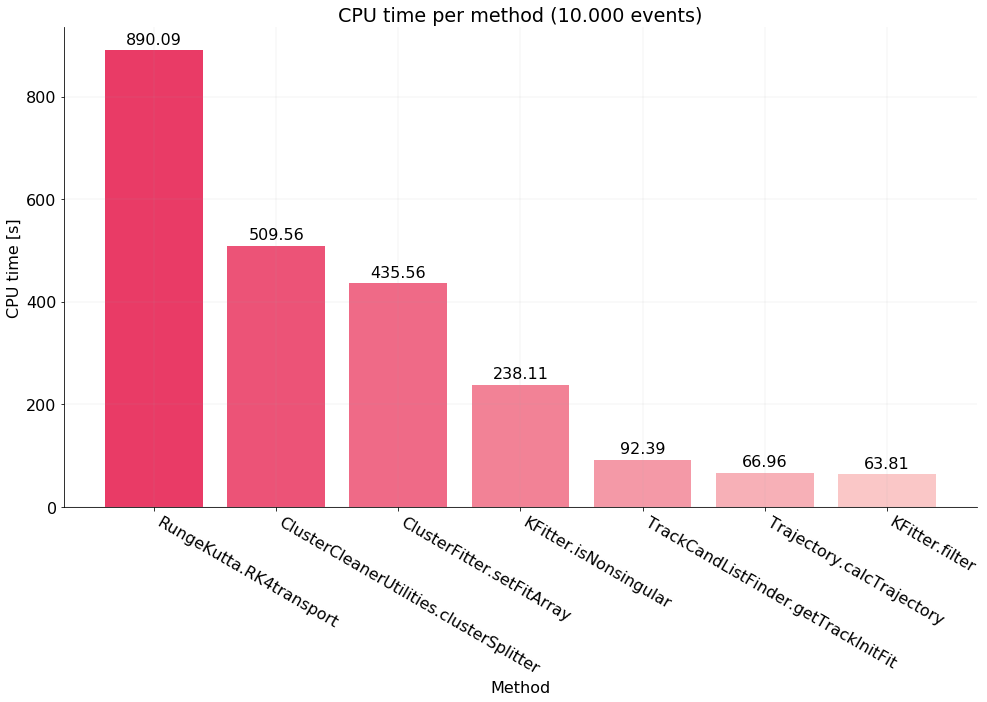

In [22]:
names = [
    "RungeKutta.RK4transport",
    "ClusterCleanerUtilities.clusterSplitter",
    "ClusterFitter.setFitArray",
    "KFitter.isNonsingular",
    "TrackCandListFinder.getTrackInitFit",
    "Trajectory.calcTrajectory",
    "KFitter.filter",
]
times = [890.09, 509.56, 435.56, 238.11,  92.39,  66.96,  63.81]

methods_plot(names, times, grad_7)

# version 1.1

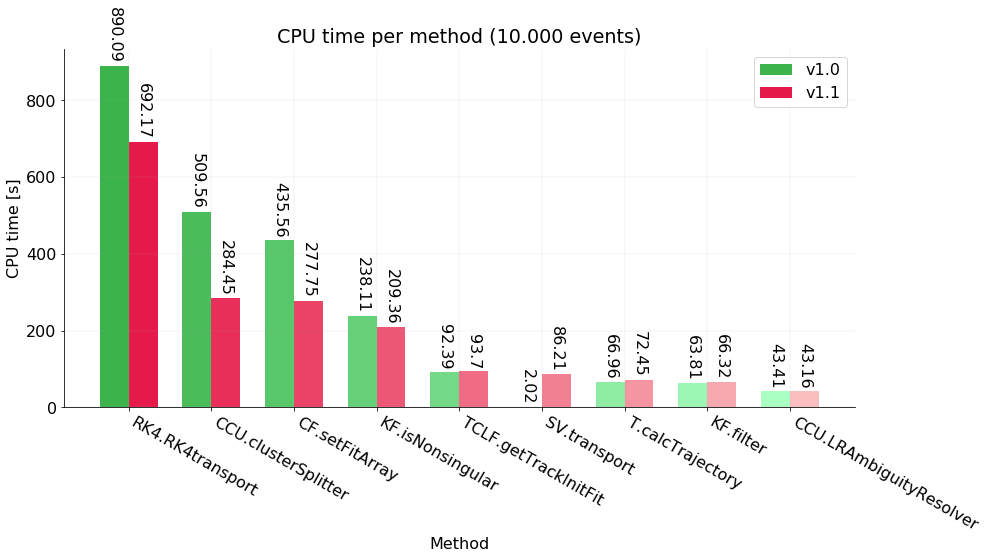

In [23]:
methods = ["RK4.RK4transport",
           "CCU.clusterSplitter",
           "CF.setFitArray",
           "KF.isNonsingular",
           "TCLF.getTrackInitFit",
           "SV.transport",
           "T.calcTrajectory",
           "KF.filter",
           "CCU.LRAmbiguityResolver"
          ]
old_time = np.array([890.09, 509.56, 435.56, 238.11,  92.39,   2.02,  66.96,  63.81,  43.41])
new_time = np.array([692.17, 284.45, 277.75, 209.36,  93.70,  86.21,  72.45,  66.32,  43.16])

methods_contrast_plot(methods, (old_time, new_time), (grad_9_gre, grad_9_red))